## Batch Normalization

- ResNet에서 성능 향상에 중요한 역할
- 초기에는 Covariante Shift에 의해 잘 작동된다고 알려짐
- 추후에는 Optimization Landscape Smoothing에 의해 안정적인 학습
- Batch Size에 민감하다는 단점
    - Layer, Instance, Group Norm이 탄생

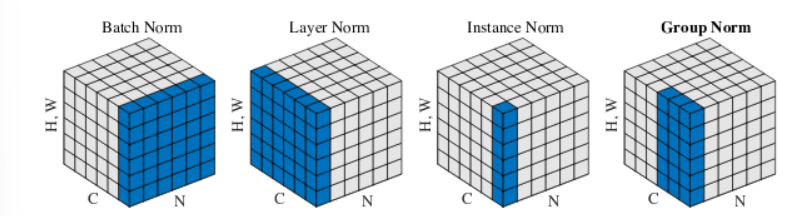

In [1]:
import torch, torchvision
import torch.nn as nn
import torchvision.models as models
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
from PIL import Image

In [8]:
## 한 channel에 대해 normalize
class BatchNorm(nn.Module):
    def __init__(self, in_channel, out_channels):
        super(BatchNorm, self).__init__()
        self.bn = nn.BatchNorm2d(in_channel)
        
    def forward(self, x):
        out = self.bn(x) # [N, C, HW] -> [N, C, HW]
        return out
    
## For different sequences, e.g., RNN.
## 모든 channel에 대해 normalize
class LayerNorm(nn.Module):
    def __init__(self, in_shape, out_channels):
        super(LayerNorm, self).__init__()
        self.ln = nn.LayerNorm(in_shape, eps=1e-08)
        
    def forward(self, x):
        out = self.ln(x) # [N, C, HW] -> [N, C, HW]
        return out
    
## For style transfer, domain adaptation.
## Instance 단위로 normalize
## Batch 단위가 중요하지 않은 task에서 효과적.
## Batch간 correlation이 없는 경우.
class InstanceNorm(nn.Module):
    def __init__(self, in_channel, out_channels):
        super(InstanceNorm, self).__init__()
        self.In = nn.InstanceNorm2d(in_channel, eps=1e-08) 

    def forward(self, x):
        out = self.In(x)  #[N, C, HW] -> [N, C, HW]
        return out
    
## Stable in small batch size
## Channel이 1024개면 512, 512로 나눔. 이를 group_size에 지정.
class GroupNorm(nn.Module):
    def __init__(self, group_size, in_channel, out_channels):
        super(GroupNorm, self).__init__()
        self.gn = nn.GroupNorm(group_size, in_channel, eps=1e-08)  ## num_group and in_channel

    def forward(self,x):
        out = self.gn(x) #[N, C, HW] -> [N, C, HW]
        return out

In [9]:
in_channel = 64
feature = torch.randn(8, in_channel, 120, 120) # temp tensor [B, C, H, W]
print(feature.shape)

BN = BatchNorm(in_channel, out_channels=64)
out_feat = BN(feature)
print(out_feat.shape)

torch.Size([8, 64, 120, 120])
torch.Size([8, 64, 120, 120])


In [10]:
LN = LayerNorm(in_shape=list(feature.shape[1:]), out_channels=64)

out_feat = LN(feature)

print(out_feat.shape)

torch.Size([8, 64, 120, 120])


In [11]:
IN=InstanceNorm(in_channel, out_channels=64)

out_feat = IN(feature)

print(out_feat.shape)

torch.Size([8, 64, 120, 120])


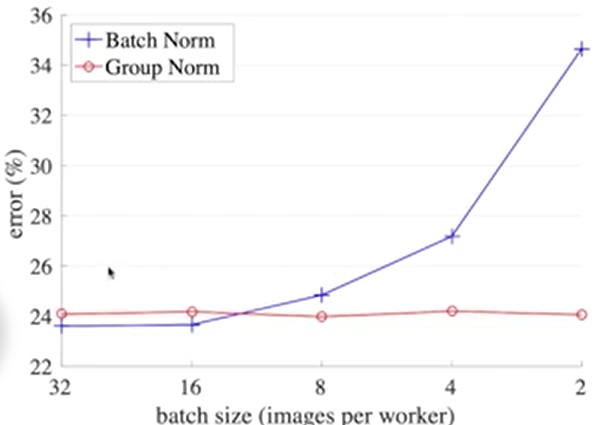

- 배치 사이즈가 작을 경우 일반 batch norm은 성능이 떨어짐

In [12]:
GN=GroupNorm(group_size=2, in_channel=in_channel, out_channels=64)

out_feat = GN(feature)

print(out_feat.shape)  ## 32 / 32

GN=GroupNorm(group_size=4, in_channel=in_channel, out_channels=64)

out_feat = GN(feature)

print(out_feat.shape)  ## 16 / 16 / 16 / 16

torch.Size([8, 64, 120, 120])
torch.Size([8, 64, 120, 120])
